In [77]:
import pandas as pd
import requests
from StringIO import StringIO
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict


r = requests.get('https://docs.google.com/spreadsheets/d/e/2PACX-1vRUQqfvGcv5-KrgYuLynYUBwrjRztlP2pJlSZK-QFX3EcFU18TTQ7vqOAN30fzoBz7eDASkGVIcd0D4/pub?output=csv')
data = r.content
df = pd.read_csv(StringIO(data), parse_dates=['Timestamp'])
df.head()

,Timestamp,Did you vote in the last election?,Do you know who your congressional representative(s) are?,Where would you consider yourself on the political spectrum?,What factors are most important in your selection of a candidate? (select all that apply)
0,2017-09-24 11:35:55,Yes,Yes,Left,"Overall political philosophy, Stance on a key ..."
1,2017-09-27 18:40:11,Yes,Yes,Mostly Left,"Overall political philosophy, Stance on a key ..."
2,2017-09-27 18:40:21,Yes,Yes,Mostly Left,Likelihood of executing on world-favorable obj...
3,2017-09-27 18:40:33,Yes,Yes,Left,"Success rate in passing legislation, Overall p..."
4,2017-09-27 18:40:54,Yes,No,Middle of the road,"Success rate in passing legislation, Overall p..."


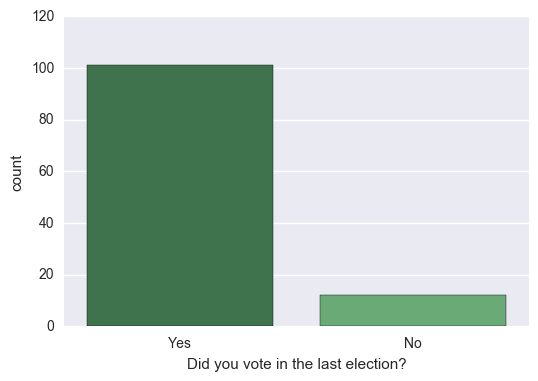

In [48]:
sns.countplot(x="Did you vote in the last election?", data=df, palette="Greens_d");

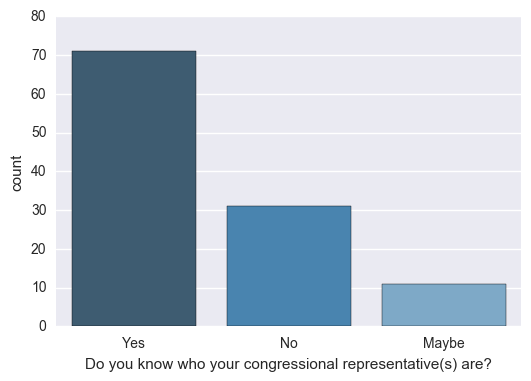

In [52]:
sns.countplot(x='Do you know who your congressional representative(s) are?', data=df, palette="Blues_d");

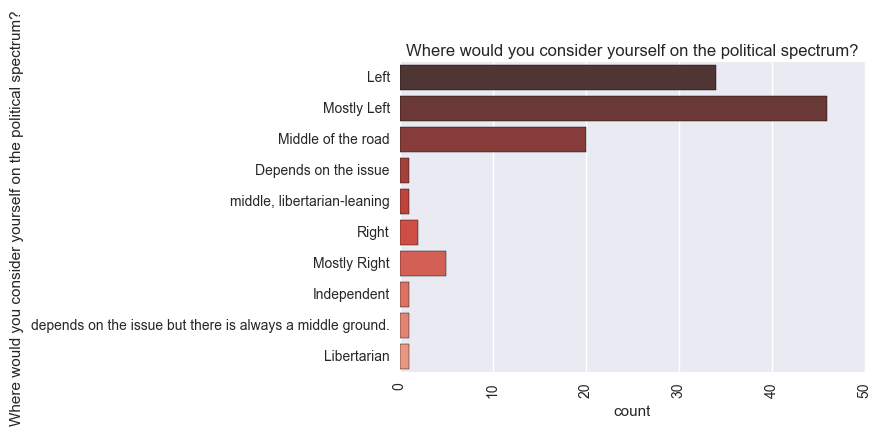

In [67]:
plt.setp((sns.countplot(y='Where would you consider yourself on the political spectrum?', 
                        data=df, palette="Reds_d")).get_xticklabels(), rotation=90);
plt.title('Where would you consider yourself on the political spectrum?');

In [83]:
things = defaultdict(int)

for item in df[u'What factors are most important in your selection of a candidate? (select all that apply)']:
    #answers are grouped by user, thus we need to split them out
    if "," in item:
        for i in item.split(","):
            things[i] += 1
    else:
        things[item] += 1

In [95]:
print "Top Priorities"
sorted( ((v,k) for k,v in things.iteritems()), reverse=True)

Top Priorities


[(72, 'Overall political philosophy'),
 (63, ' Stance on a key issue that is important to me'),
 (35, ' History of bipartisanship'),
 (33, ' Previous political experience'),
 (31, ' Public image and persona'),
 (27, ' Education & military experience'),
 (23, 'Success rate in passing legislation'),
 (22, ' Overall political philosophy'),
 (13, 'Stance on a key issue that is important to me'),
 (2, 'Education & military experience'),
 (1, 'Public image and persona'),
 (1, 'Likelihood of executing on world-favorable objectives.'),
 (1, 'History of bipartisanship'),
 (1, ' strength of character'),
 (1, ' rational thinking'),
 (1, ' non-religious'),
 (1, " doesn't need to be political"),
 (1, ' but it is now... :('),
 (1, ' are they a good & educated person'),
 (1, ' Stance on a key issue'),
 (1, ' Public image was never important before'),
 (1, ' Not a lifer who is just being driven by lobbyists now!'),
 (1, ' Experience in general'),
 (1, ' Ethics & Speaking/Writing Skills'),
 (1, ' Does 